# Exercise 4
## Elliptical Isophotal Analysis of a Galaxy Image

Fit elliptical isophotes to a galaxy image. 

STEPS

- Read fits image of the galaxy

- Use the ISOPHOTE package in PHOTUTILS to fit elliptical isophotes to image
  (see http://photutils.readthedocs.io/en/stable/isophote.html)

- Display the initial ellipse on the image and iterate to find the correct initial parameters

- Create elliptical isophotes and overplot the isophotes on the image
  
- Plot the ellipticity, position angle, and the center x and y position of the ellipses as a function of the semimajor axis length

- Plot the surface brightness profile of the galaxy:
  - Compute SB: sb = (intens - skybkg)/(0.56*0.56)
  - Transform in mag/sq. arcsec: -2.5*np.log10(sb)+29.61
  - Transform sma in arcsec: sma_arcsec = sma * 0.56
  - plot SB [mag/sq. arsec] versus sma [arcsec]


## Import Modules

In [1]:
%matplotlib inline

# read fits image
from astropy.io import fits
import numpy as np

#plot
import matplotlib.pyplot as plt



magzero = 29.61  #Magnitude photometric zeropoint
pixscale = 0.56  #Plate scale (dx dy)   [arcsec per pixel]

#for azimuthal average
from photutils.isophote import EllipseGeometry
from photutils import EllipticalAperture
from photutils.isophote import Ellipse

## Read galaxy and model images

In [2]:
data = ('NGC4690-output.fits')
image = fits.getdata(data, ext=2)

## Select initial ellipse parameters and display on image

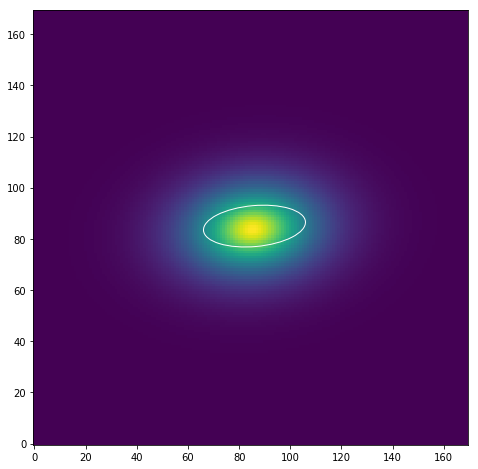

In [3]:
#x0/y0: center
#sma: semimajor axis
#eps: ellipticity
#pa: position angle relativ to x-axis towards y-axis
geometry = EllipseGeometry(x0=86, y0=85, sma=20, eps=0.6, pa=(-84.9+90)*np.pi/180.)

aperture = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma, geometry.sma*(1 - geometry.eps), geometry.pa)

plt.figure(figsize=(8, 8))
plt.imshow(image, origin='lower')
aperture.plot(color='white')

## Create and plot elliptical isophotes

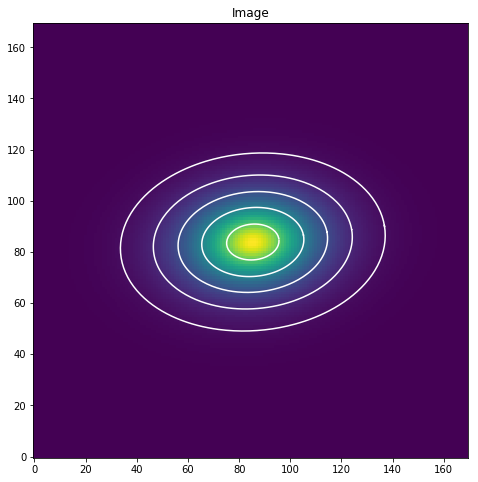

In [4]:
ellipse = Ellipse(image, geometry)
isolist = ellipse.fit_image()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, origin='lower')
ax.set_title('Image')

smas = np.linspace(10, 50, 5)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax.plot(x, y, color='white')

## Plot the ellipticity, position angle, and the center x and y position of the ellipses as a function of the semimajor axis length

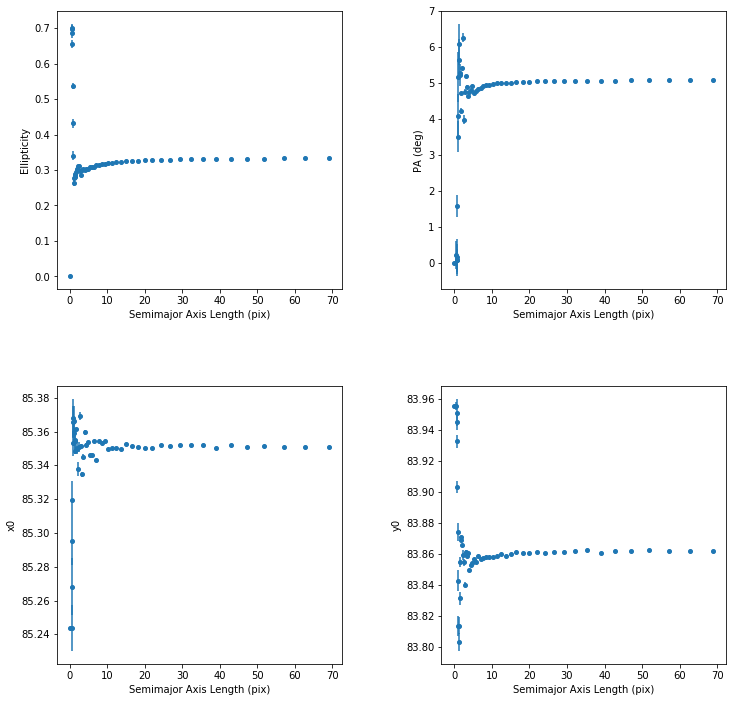

In [5]:
#print(isolist.to_table())
#print(isolist.pa) 

plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.subplot(2, 2, 1)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err, fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipticity')

plt.subplot(2, 2, 2)
plt.errorbar(isolist.sma, isolist.pa/np.pi*180., yerr=isolist.pa_err/np.pi* 80., fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('PA (deg)')

plt.subplot(2, 2, 3)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('x0')

plt.subplot(2, 2, 4)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('y0');

### Plot SB profile
The relativ errors are of order $10^{-6}$. 
So they are much smaller than the markers.

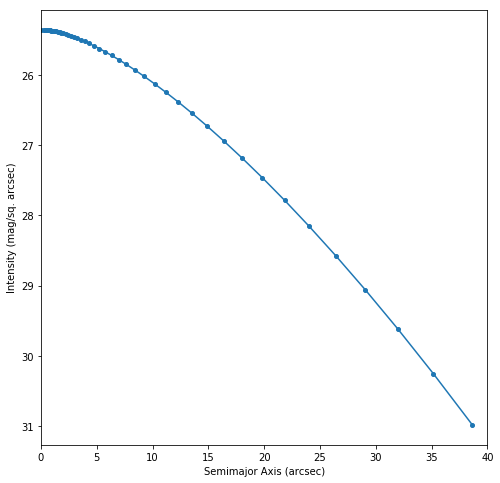

In [6]:
skybkg = 511.2493
intens = -2.5*np.log10((isolist.intens-skybkg)/(0.56**2))+29.61
sma = isolist.sma * 0.56
in_error = (1.08574*isolist.int_err)/(isolist.intens-skybkg)


plt.figure(figsize=(8, 8))
plt.errorbar(sma, intens, yerr=in_error, fmt='-o', markersize=4)
plt.gca().invert_yaxis()
plt.xlim(0,40)
plt.xlabel('Semimajor Axis (arcsec)')
plt.ylabel('Intensity (mag/sq. arcsec)');